# COVID classificaion from x-ray images using resnet101 by fast.ai framework


epoch,train_loss,valid_loss,accuracy,time
0,1.057365,0.974448,0.625000,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.423465,0.672764,0.725000,00:04
1,0.427885,0.524264,0.725000,00:04
2,0.358773,0.490136,0.775000,00:05
3,0.318759,0.545090,0.675000,00:04
4,0.312121,0.599979,0.700000,00:04
5,0.299519,0.776429,0.650000,00:04
6,0.282450,0.928734,0.650000,00:05
7,0.263314,0.904058,0.675000,00:04
8,0.247092,0.792919,0.700000,00:04
9,0.234157,0.631534,0.750000,00:05


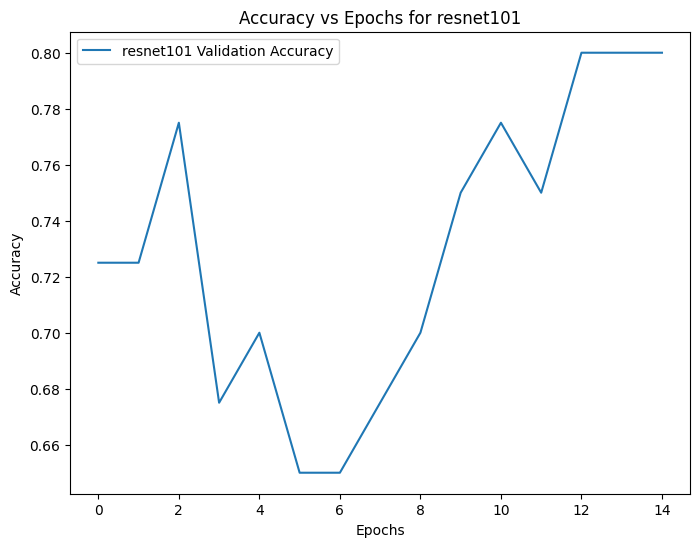

Overall accuracy for resnet101: 0.8000


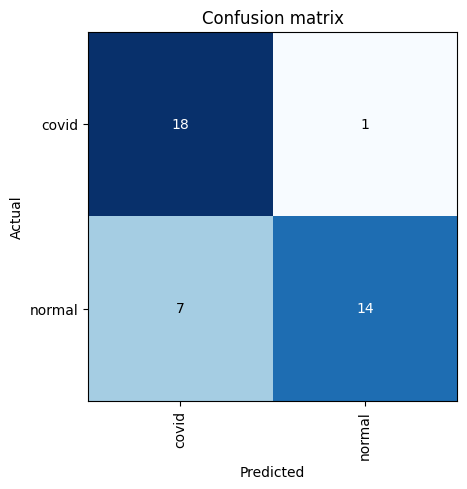

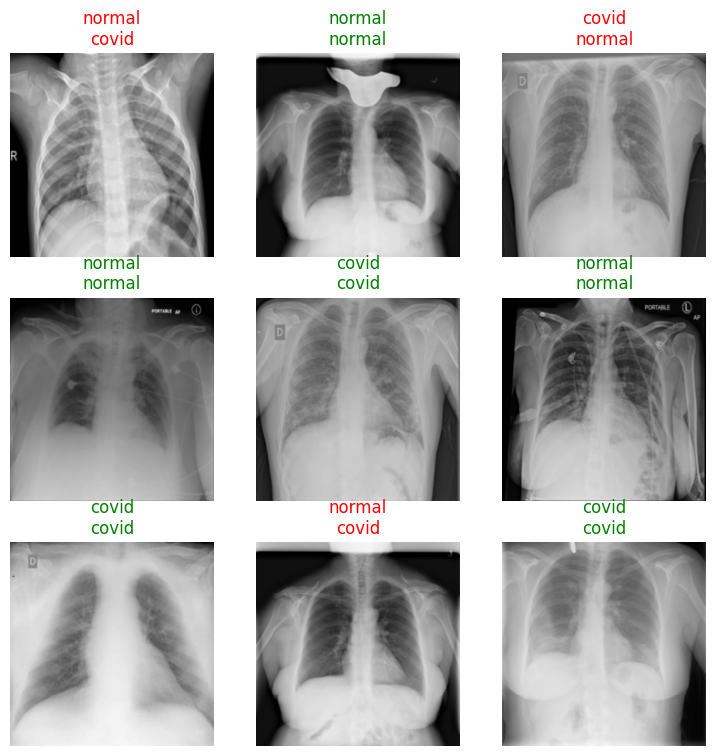

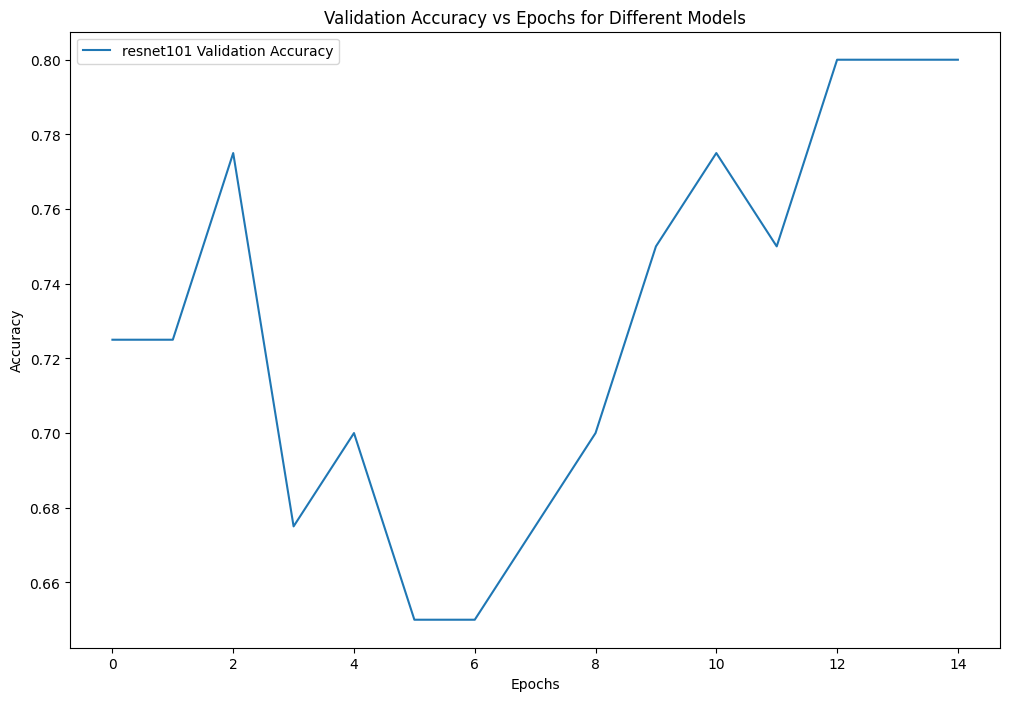

Overall accuracy for resnet101: 0.8000


In [ ]:
# # Step 1: Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# # Step 2: Install FastAI
# !pip install fastai

# Step 3: Load Data
from fastai.vision.all import *
import matplotlib.pyplot as plt

# Define the path to the dataset
path = Path('/content/drive/MyDrive/ML DL')

# Define the DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

# Create the DataLoaders
dls = dblock.dataloaders(path)

# Step 4: Train and Evaluate Multiple Models
def train_and_plot(model_func, dls):
    # Create learner
    learn = vision_learner(dls, model_func, metrics=accuracy)

    # Train the model
    learn.fine_tune(15)

    # Extract accuracy metrics
    valid_accuracies = [v[2] for v in learn.recorder.values]

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(valid_accuracies, label=f'{model_func.__name__} Validation Accuracy')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Accuracy vs Epochs for {model_func.__name__}')
    plt.legend()
    plt.show()

    # Print confusion matrix and overall accuracy
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix()
    overall_accuracy = learn.validate()[1]
    print(f'Overall accuracy for {model_func.__name__}: {overall_accuracy:.4f}')

    # Return the learner and its accuracies
    return learn, valid_accuracies, overall_accuracy

# List of models to train
models = [resnet101]  # resnet101 is directly imported from fastai.vision.all

# Train and plot for each model
learners = []
valid_accuracies = []
overall_accuracies = []

for model_func in models:
    learner, valid_accuracy, overall_accuracy = train_and_plot(model_func, dls)
    learners.append(learner)
    valid_accuracies.append((model_func.__name__, valid_accuracy))
    overall_accuracies.append((model_func.__name__, overall_accuracy))

# Step 5: Evaluate and Save the Models
for learner, model_func in zip(learners, models):
    # Evaluate the model
    learner.show_results()

    # Save the model
    learner.export(f'/content/drive/MyDrive/covid_classifier_{model_func.__name__}.pkl')

# Step 6: Plot Combined Accuracy Graph
plt.figure(figsize=(12, 8))
for model_name, valid_accuracy in valid_accuracies:
    plt.plot(valid_accuracy, label=f'{model_name} Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs Epochs for Different Models')
plt.legend()
plt.show()

# Print overall accuracies
for model_name, overall_accuracy in overall_accuracies:
    print(f'Overall accuracy for {model_name}: {overall_accuracy:.4f}')
